In [11]:
## PROCEDURE:

# 1. Take three screen recordings of different angles of the paper (x, y, and z) being folded from 0% to 100%.
#     - Origami simulator: https://origamisimulator.org/. 
# 2. Import videos and use motion tracker on corners - try different tracker resistant to disappearance of object. 
#     - Run tracker 12 (3x4) times as tracking corners separately (wings tips, beak, and tail). 
# 3. Create 4 different xy-matrices (for each axis) - should have 6 rows each.
#     - We want to compare motion according to the corner!
#     - Otherwise, PCA shall be comparing different corners along the same axis.
# 4. Run PCA and SINDy - each corner SINDy should have either 2 or 4 elements (consider physics behind that). 
# 5. Run a comparison between SINDY models and see how similar the motion is for each corner.
#     - PCA and SINDy models: Compare the two motion models for the wing tips and the two motion models for the beak and tail in order to see how well they overlap. 
#     - Overlap the PCA and SINDy model graphs and perhaps run an error calculation or simply visualize the difference between the models.
# 6. Future directions: motion tracker for four corners at the same time.
#     - A single motion tracker would lead to a very complex SINDy model.
#     - Disappearance of the corners means the tracker may get confused. 

#   o Basically, an x, y, and z point of view, making sure to get the crane's head at the front corner for the x and y angles. 
#   o The colour is 66CC00 for both sides of the paper, as it kind of lags with two separate colours. 
#   o We are using the crane as it is the oldest model of origami. 
#   o The corners end up at the tips of the model due to the symmetry of the model.
#     - The center of the paper ends up at the middle point of the back once complete. 

In [1]:
! pip install numpy
import numpy as np
import scipy.io
import matplotlib.pyplot as lib
from PIL import Image as im
import cv2 as cv

In [3]:
mat_beak = np.load("mat_beak.npy")
print(mat_beak.shape)

mat_rw = np.load("mat_rw.npy")
print(mat_rw.shape)

mat_lw = np.load("mat_lw.npy")
print(mat_lw.shape)

mat_tail = np.load("mat_tail.npy")
print(mat_tail.shape)

[[ -37.17111111  -36.67111111  -37.17111111 ...   80.82888889
    80.32888889  -37.17111111]
 [  28.49555556   27.99555556   28.49555556 ...  -90.00444444
   -90.50444444   28.49555556]
 [  55.67333333   55.67333333   55.67333333 ...  -81.82666667
   -81.82666667   55.67333333]
 [  36.00666667   36.00666667   36.00666667 ...  -77.49333333
   -77.49333333   36.00666667]
 [ -38.52666667  -38.02666667  -38.52666667 ...  111.97333333
   111.47333333  -38.52666667]
 [  45.76222222   45.26222222   45.26222222 ...  -81.73777778
   -81.73777778 -593.73777778]]
(6, 225)
(6, 225)
(6, 225)


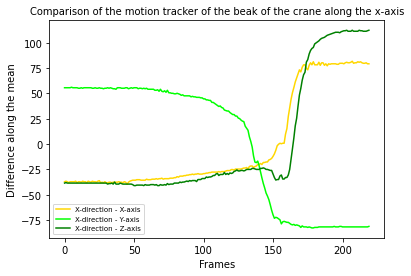

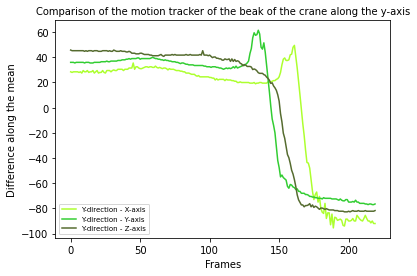

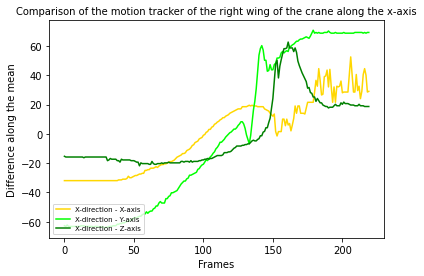

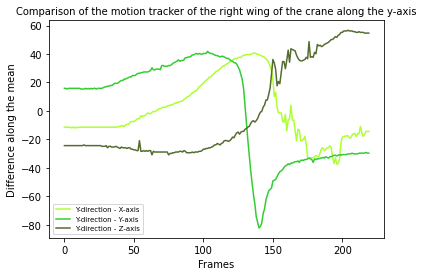

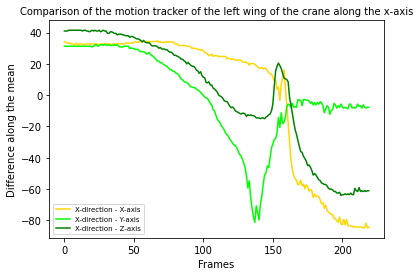

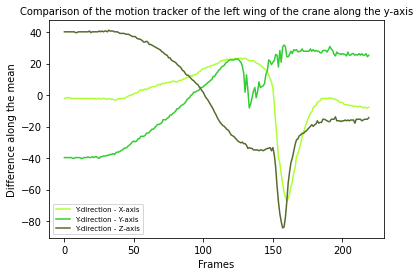

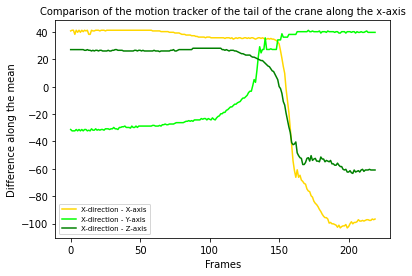

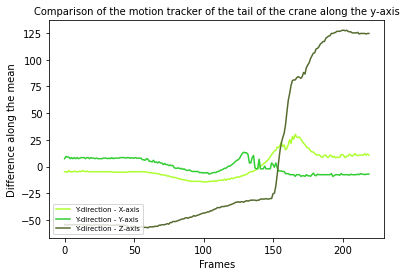

'\n\nlib.plot(mat_tail[0,0:220], c = "gold", label = "X-direction - X-axis")\nlib.plot(mat_tail[1,0:220], c = "greenyellow", label = "Y-direction - X-axis")\nlib.plot(mat_tail[2,0:220], c = "lime", label = "X-direction - Y-axis")\nlib.plot(mat_tail[3,0:220], c = "limegreen", label = "Y-direction - Y-axis")\nlib.plot(mat_tail[4,0:220], c = "green", label = "X-direction - Z-axis")\nlib.plot(mat_tail[5,0:220], c = "darkolivegreen", label = "Y-direction - Z-axis")\nlib.xlabel("Frames")\nlib.ylabel("Difference along the mean")\nlib.title("Comparison of the motion tracker of the tail of the crane along all axes", fontsize = 10)\nlib.legend(loc = "lower left", prop = {"size":7})\nlib.savefig("tail_means.png")\nlib.show()\n\n'

In [14]:
lib.plot(mat_beak[0,0:220], c = "gold", label = "X-direction - X-axis")
lib.plot(mat_beak[2,0:220], c = "lime", label = "X-direction - Y-axis")
lib.plot(mat_beak[4,0:220], c = "green", label = "X-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the beak of the crane along the x-axis", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("beak_means_x.png")
lib.show()

lib.plot(mat_beak[1,0:220], c = "greenyellow", label = "Y-direction - X-axis")
lib.plot(mat_beak[3,0:220], c = "limegreen", label = "Y-direction - Y-axis")
lib.plot(mat_beak[5,0:220], c = "darkolivegreen", label = "Y-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the beak of the crane along the y-axis", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("beak_means_y.png")
lib.show()

"""

lib.plot(mat_beak[0,0:220], c = "gold", label = "X-direction - X-axis")
lib.plot(mat_beak[1,0:220], c = "greenyellow", label = "Y-direction - X-axis")
lib.plot(mat_beak[2,0:220], c = "lime", label = "X-direction - Y-axis")
lib.plot(mat_beak[3,0:220], c = "limegreen", label = "Y-direction - Y-axis")
lib.plot(mat_beak[4,0:220], c = "green", label = "X-direction - Z-axis")
lib.plot(mat_beak[5,0:220], c = "darkolivegreen", label = "Y-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the beak of the crane along all axes", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("beak_means.png")
lib.show()

"""

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

lib.plot(mat_rw[0,0:220], c = "gold", label = "X-direction - X-axis")
lib.plot(mat_rw[2,0:220], c = "lime", label = "X-direction - Y-axis")
lib.plot(mat_rw[4,0:220], c = "green", label = "X-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the right wing of the crane along the x-axis", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("rw_means_x.png")
lib.show()

lib.plot(mat_rw[1,0:220], c = "greenyellow", label = "Y-direction - X-axis")
lib.plot(mat_rw[3,0:220], c = "limegreen", label = "Y-direction - Y-axis")
lib.plot(mat_rw[5,0:220], c = "darkolivegreen", label = "Y-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the right wing of the crane along the y-axis", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("rw_means_y.png")
lib.show()

"""

lib.plot(mat_rw[0,0:220], c = "gold", label = "X-direction - X-axis")
lib.plot(mat_rw[1,0:220], c = "greenyellow", label = "Y-direction - X-axis")
lib.plot(mat_rw[2,0:220], c = "lime", label = "X-direction - Y-axis")
lib.plot(mat_rw[3,0:220], c = "limegreen", label = "Y-direction - Y-axis")
lib.plot(mat_rw[4,0:220], c = "green", label = "X-direction - Z-axis")
lib.plot(mat_rw[5,0:220], c = "darkolivegreen", label = "Y-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the right wing of the crane along all axes", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("rw_means.png")
lib.show()

"""

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

lib.plot(mat_lw[0,0:220], c = "gold", label = "X-direction - X-axis")
lib.plot(mat_lw[2,0:220], c = "lime", label = "X-direction - Y-axis")
lib.plot(mat_lw[4,0:220], c = "green", label = "X-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the left wing of the crane along the x-axis", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("lw_means_x.png")
lib.show()

lib.plot(mat_lw[1,0:220], c = "greenyellow", label = "Y-direction - X-axis")
lib.plot(mat_lw[3,0:220], c = "limegreen", label = "Y-direction - Y-axis")
lib.plot(mat_lw[5,0:220], c = "darkolivegreen", label = "Y-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the left wing of the crane along the y-axis", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("lw_means_y.png")
lib.show()

"""

lib.plot(mat_lw[0,0:220], c = "gold", label = "X-direction - X-axis")
lib.plot(mat_lw[1,0:220], c = "greenyellow", label = "Y-direction - X-axis")
lib.plot(mat_lw[2,0:220], c = "lime", label = "X-direction - Y-axis")
lib.plot(mat_lw[3,0:220], c = "limegreen", label = "Y-direction - Y-axis")
lib.plot(mat_lw[4,0:220], c = "green", label = "X-direction - Z-axis")
lib.plot(mat_lw[5,0:220], c = "darkolivegreen", label = "Y-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the left wing of the crane along all axes", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("lw_means.png")
lib.show()

"""

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

lib.plot(mat_tail[0,0:220], c = "gold", label = "X-direction - X-axis")
lib.plot(mat_tail[2,0:220], c = "lime", label = "X-direction - Y-axis")
lib.plot(mat_tail[4,0:220], c = "green", label = "X-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the tail of the crane along the x-axis", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("tail_means_x.png")
lib.show()

lib.plot(mat_tail[1,0:220], c = "greenyellow", label = "Y-direction - X-axis")
lib.plot(mat_tail[3,0:220], c = "limegreen", label = "Y-direction - Y-axis")
lib.plot(mat_tail[5,0:220], c = "darkolivegreen", label = "Y-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the tail of the crane along the y-axis", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("tail_means_y.png")
lib.show()

"""

lib.plot(mat_tail[0,0:220], c = "gold", label = "X-direction - X-axis")
lib.plot(mat_tail[1,0:220], c = "greenyellow", label = "Y-direction - X-axis")
lib.plot(mat_tail[2,0:220], c = "lime", label = "X-direction - Y-axis")
lib.plot(mat_tail[3,0:220], c = "limegreen", label = "Y-direction - Y-axis")
lib.plot(mat_tail[4,0:220], c = "green", label = "X-direction - Z-axis")
lib.plot(mat_tail[5,0:220], c = "darkolivegreen", label = "Y-direction - Z-axis")
lib.xlabel("Frames")
lib.ylabel("Difference along the mean")
lib.title("Comparison of the motion tracker of the tail of the crane along all axes", fontsize = 10)
lib.legend(loc = "lower left", prop = {"size":7})
lib.savefig("tail_means.png")
lib.show()

"""

In [15]:
## RUNNING PCA: STEP 1 - COVARIANCE MATRIX
# This allows to determine the dominant spatial directions of motion (how one moves around in the projected plane).

In [16]:
## DIAGONALIZING THROUGH SVD: REMOVING REDUNDANCIES

Ub, Sb, VTb = np.linalg.svd(mat_beak)
UTb = np.transpose(Ub)

Ur, Sr, VTr = np.linalg.svd(mat_rw)
UTr = np.transpose(Ur)

Ul, Sl, VTl = np.linalg.svd(mat_lw)
UTl = np.transpose(Ul)

Ut, St, VTt = np.linalg.svd(mat_tail)
UTt = np.transpose(Ut)

In [17]:
## RUNNING PCA: STEP 2 - COVARIANCE MATRIX WITHOUT TIME

Yb = np.matmul(UTb, mat_beak) # These allow for a change in basis, effectively removing time.
covmatYb = np.cov(Yb) # Determining the dominant spatial directions of motion without time.

print(covmatYb.shape)
print(covmatYb) # It is a diagonal matrix.

Yr = np.matmul(UTr, mat_rw) # These allow for a change in basis, effectively removing time.
covmatYr = np.cov(Yr) # Determining the dominant spatial directions of motion without time.

print(covmatYr.shape)
print(covmatYr) # It is a diagonal matrix.

Yl = np.matmul(UTl, mat_lw) # These allow for a change in basis, effectively removing time.
covmatYl = np.cov(Yl) # Determining the dominant spatial directions of motion without time.

print(covmatYl.shape)
print(covmatYl) # It is a diagonal matrix.

Yt = np.matmul(UTt, mat_tail) # These allow for a change in basis, effectively removing time.
covmatYt = np.cov(Yt) # Determining the dominant spatial directions of motion without time.

print(covmatYt.shape)
print(covmatYt) # It is a diagonal matrix.

(6, 6)
[[ 1.62051435e+04  1.38048303e-12 -9.74458609e-13 -2.95585778e-12
   2.89190893e-12  1.21908832e-12]
 [ 1.38048303e-12  1.59256060e+03  3.59331612e-13 -1.37033242e-13
  -2.94875235e-13  3.46389584e-14]
 [-9.74458609e-13  3.59331612e-13  1.02547824e+03 -3.65421978e-13
  -2.36255460e-13 -4.11734139e-14]
 [-2.95585778e-12 -1.37033242e-13 -3.65421978e-13  1.40534536e+02
  -1.39570895e-15  3.19427025e-14]
 [ 2.89190893e-12 -2.94875235e-13 -2.36255460e-13 -1.39570895e-15
   4.13617315e+01  4.12368552e-16]
 [ 1.21908832e-12  3.46389584e-14 -4.11734139e-14  3.19427025e-14
   4.12368552e-16  2.83656571e+00]]
(6, 6)
[[ 5.66861460e+03  9.74458609e-13  3.24819536e-13 -4.30385886e-13
   6.69940294e-14 -1.66774531e-12]
 [ 9.74458609e-13  5.94174326e+02 -1.62409768e-14 -1.17747082e-13
  -1.19777204e-13 -1.68246369e-13]
 [ 3.24819536e-13 -1.62409768e-14  3.81616376e+02  1.19777204e-13
  -1.62409768e-14  8.12048841e-15]
 [-4.30385886e-13 -1.17747082e-13  1.19777204e-13  1.26720300e+02
  -5.17681

(6,)
[1905.2433313   597.27177547  479.27771366  177.42529708   96.25501468
   25.20695775]


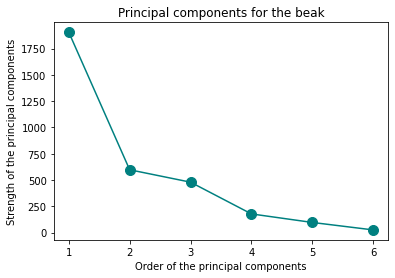

(6,)
[1126.84056961  364.82194155  292.37316589  168.4795159    78.98229949
   57.2057723 ]


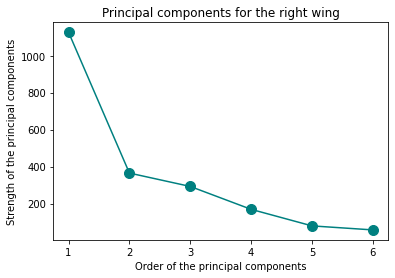

(6,)
[1008.56294506  512.95776181  309.31103471  143.26487973   44.82852179
   30.42045952]


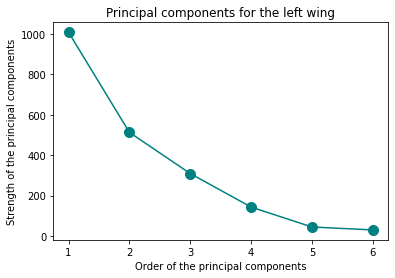

(6,)
[1561.11541556  232.6146023   109.44108324   63.09742291   32.79091046
   20.14155841]


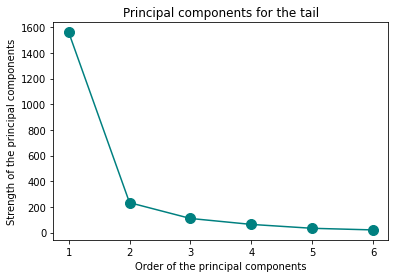

In [21]:
print(Sb.shape)
print(Sb)

t = (1,2,3,4,5,6)

lib.plot(t, Sb, marker = 'o', markersize = 10, c = 'teal')
lib.xlabel('Order of the principal components')
lib.ylabel('Strength of the principal components')
lib.title('Principal components for the beak')
lib.savefig("Principal_Components_beak.png")
lib.show()

# For the beak, use the first principal component only. 

print(Sr.shape)
print(Sr)

lib.plot(t, Sr, marker = 'o', markersize = 10, c = 'teal')
lib.xlabel('Order of the principal components')
lib.ylabel('Strength of the principal components')
lib.title('Principal components for the right wing')
lib.savefig("Principal_Components_rw.png")
lib.show()

# For the right wing, use the first principal component only. 

print(Sl.shape)
print(Sl)

lib.plot(t, Sl, marker = 'o', markersize = 10, c = 'teal')
lib.xlabel('Order of the principal components')
lib.ylabel('Strength of the principal components')
lib.title('Principal components for the left wing')
lib.savefig("Principal_Components_lw.png")
lib.show()

# For the left wing, use the first TWO principal components. 

print(St.shape)
print(St)

lib.plot(t, St, marker = 'o', markersize = 10, c = 'teal')
lib.xlabel('Order of the principal components')
lib.ylabel('Strength of the principal components')
lib.title('Principal components for the tail')
lib.savefig("Principal_Components_tail.png")
lib.show()

# For the tail, use the first principal component only. 

# The principal components in this scenario determine the directions in which the variation occurs the most. 

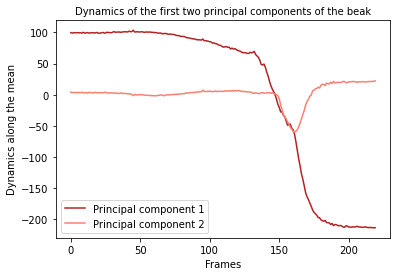

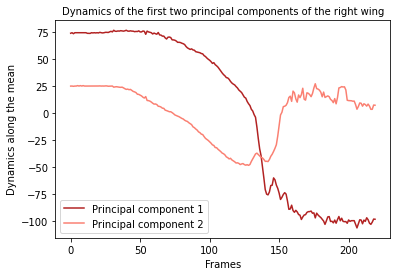

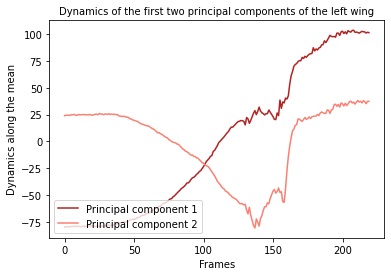

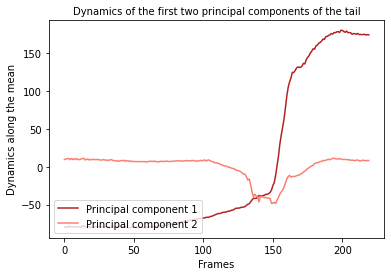

In [330]:
lib.plot(Sb[0]*VTb[0,0:220], c = 'firebrick', label = 'Principal component 1')
lib.plot(Sb[1]*VTb[1,0:220], c = 'salmon', label = 'Principal component 2')
lib.xlabel('Frames')
lib.ylabel('Dynamics along the mean')
lib.title('Dynamics of the first two principal components of the beak', fontsize = 10)
lib.legend(loc = 'lower left', prop = {'size':10})
lib.savefig("PCA_beak.png")
lib.show()

lib.plot(Sr[0]*VTr[0,0:220], c = 'firebrick', label = 'Principal component 1')
lib.plot(Sr[1]*VTr[1,0:220], c = 'salmon', label = 'Principal component 2')
lib.xlabel('Frames')
lib.ylabel('Dynamics along the mean')
lib.title('Dynamics of the first two principal components of the right wing', fontsize = 10)
lib.legend(loc = 'lower left', prop = {'size':10})
lib.savefig("PCA_rw.png")
lib.show()

lib.plot(Sl[0]*VTl[0,0:220], c = 'firebrick', label = 'Principal component 1')
lib.plot(Sl[1]*VTl[1,0:220], c = 'salmon', label = 'Principal component 2')
lib.xlabel('Frames')
lib.ylabel('Dynamics along the mean')
lib.title('Dynamics of the first two principal components of the left wing', fontsize = 10)
lib.legend(loc = 'lower left', prop = {'size':10})
lib.savefig("PCA_lw.png")
lib.show()

lib.plot(St[0]*VTt[0,0:220], c = 'firebrick', label = 'Principal component 1')
lib.plot(St[1]*VTt[1,0:220], c = 'salmon', label = 'Principal component 2')
lib.xlabel('Frames')
lib.ylabel('Dynamics along the mean')
lib.title('Dynamics of the first two principal components of the tail', fontsize = 10)
lib.legend(loc = 'lower left', prop = {'size':10})
lib.savefig("PCA_tail.png")
lib.show()

In [331]:
! pip install pysindy
import pysindy as py

In [332]:
model = py.SINDy()
print(model)

SINDy(differentiation_method=FiniteDifference(axis=-2),
      feature_library=PolynomialLibrary(), optimizer=STLSQ())


In [333]:
mat_beak_reduced = np.transpose(Ub[0:220,0:1])@mat_beak[:,0:220]

print(mat_beak_reduced.shape)
print(mat_beak_reduced)

mat_beak_reducedT = np.transpose(mat_beak_reduced)
print(mat_beak_reducedT.shape)
print(mat_beak_reducedT)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

mat_rw_reduced = np.transpose(Ur[0:220,0:1])@mat_rw[:,0:220]

print(mat_rw_reduced.shape)
print(mat_rw_reduced)

mat_rw_reducedT = np.transpose(mat_rw_reduced)
print(mat_rw_reducedT.shape)
print(mat_rw_reducedT)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

mat_lw_reduced = np.transpose(Ul[0:220,0:2])@mat_lw[:,0:220]

print(mat_lw_reduced.shape)
print(mat_lw_reduced)

mat_lw_reducedT = np.transpose(mat_lw_reduced)
print(mat_lw_reducedT.shape)
print(mat_lw_reducedT)

mat_lw_reduced2 = np.transpose(Ul[0:220,0:1])@mat_lw[:,0:220]

print(mat_lw_reduced2.shape)
print(mat_lw_reduced2)

mat_lw_reducedT2 = np.transpose(mat_lw_reduced2)
print(mat_lw_reducedT2.shape)
print(mat_lw_reducedT2)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

mat_tail_reduced = np.transpose(Ut[0:220,0:1])@mat_tail[:,0:220]

print(mat_tail_reduced.shape)
print(mat_tail_reduced)

mat_tail_reducedT = np.transpose(mat_tail_reduced)
print(mat_tail_reducedT.shape)
print(mat_tail_reducedT)

# The size of the matrices was reduced slightly considering the large drop-off to zero experienced in the final columns.

(1, 220)
[[ 9.97993806e+01  9.89919393e+01  9.95747186e+01  9.97581879e+01
   9.95747186e+01  9.97962641e+01  9.94012347e+01  9.95747186e+01
   9.90412421e+01  1.00294704e+02  9.89389630e+01  9.93531731e+01
   9.98835331e+01  9.89931805e+01  9.93851705e+01  9.93851705e+01
   9.98804936e+01  9.90412421e+01  9.95747186e+01  1.00108195e+02
   9.85950346e+01  9.89550272e+01  9.93661208e+01  1.00076198e+02
   9.91827287e+01  9.90442815e+01  1.00452255e+02  9.98515358e+01
   1.00041161e+02  9.95076074e+01  1.00227593e+02  1.01517519e+02
   1.00488533e+02  1.00485416e+02  1.00764109e+02  1.00801628e+02
   1.00135143e+02  1.00769631e+02  1.01087299e+02  1.01247758e+02
   1.00953580e+02  1.00954821e+02  1.02125294e+02  1.01338067e+02
   1.01486345e+02  1.03620251e+02  1.00696286e+02  1.01014088e+02
   1.01238673e+02  1.00706437e+02  1.01045638e+02  1.01235186e+02
   1.00774713e+02  1.00280444e+02  1.00675473e+02  1.00861982e+02
   1.00466952e+02  1.00860106e+02  1.00382536e+02  1.00245253e+02
 

[[-79.27489544 -80.26679226 -79.94101192 -78.13003767 -79.55455301
  -79.03332056 -79.55455301 -78.98897762 -79.55455301 -79.31297813
  -79.37678621 -79.0771614  -79.87229327 -77.79340074 -77.9722381
  -79.06452498 -79.58177911 -79.10260767 -79.58803936 -79.90577962
  -79.56914268 -79.60174634 -79.37678621 -79.22339511 -79.33351382
  -78.78486741 -79.41027255 -79.24229178 -79.22339511 -79.43464826
  -79.26666749 -78.97330294 -79.79018187 -79.76580616 -79.7712852
  -79.36339345 -79.38776916 -79.25327474 -78.72976036 -78.94101351
  -79.23437807 -79.23437807 -79.23437807 -79.36887249 -79.28676109
  -79.58012564 -80.75079222 -80.45742767 -79.88153027 -80.1116801
  -79.76593252 -79.61254143 -80.45742767 -80.27966086 -79.93391329
  -79.93391329 -79.86078616 -80.20653374 -80.18215803 -79.88547611
  -80.38461478 -79.59668735 -79.59668735 -79.57231164 -79.37752049
  -78.96687373 -78.7222606  -78.71785212 -77.94061397 -78.07069992
  -77.76929529 -77.28201617 -77.50853439 -77.15837834 -77.0347405

In [334]:
X1b = mat_beak_reducedT[:,0]
print(X1b.shape)
print(X1b)

X1r = mat_rw_reducedT[:,0]
print(X1r.shape)
print(X1r)

X1l = mat_lw_reducedT[:,0]
X2l = mat_lw_reducedT[:,1]
print(X1l.shape)
print(X2l.shape)
print(X1l)
print(X2l)

X1l2 = mat_lw_reducedT2[:,0]
print(X1l2.shape)
print(X1l2)

X1t = mat_tail_reducedT[:,0]
print(X1t.shape)
print(X1t)

(220,)
[ 9.97993806e+01  9.89919393e+01  9.95747186e+01  9.97581879e+01
  9.95747186e+01  9.97962641e+01  9.94012347e+01  9.95747186e+01
  9.90412421e+01  1.00294704e+02  9.89389630e+01  9.93531731e+01
  9.98835331e+01  9.89931805e+01  9.93851705e+01  9.93851705e+01
  9.98804936e+01  9.90412421e+01  9.95747186e+01  1.00108195e+02
  9.85950346e+01  9.89550272e+01  9.93661208e+01  1.00076198e+02
  9.91827287e+01  9.90442815e+01  1.00452255e+02  9.98515358e+01
  1.00041161e+02  9.95076074e+01  1.00227593e+02  1.01517519e+02
  1.00488533e+02  1.00485416e+02  1.00764109e+02  1.00801628e+02
  1.00135143e+02  1.00769631e+02  1.01087299e+02  1.01247758e+02
  1.00953580e+02  1.00954821e+02  1.02125294e+02  1.01338067e+02
  1.01486345e+02  1.03620251e+02  1.00696286e+02  1.01014088e+02
  1.01238673e+02  1.00706437e+02  1.01045638e+02  1.01235186e+02
  1.00774713e+02  1.00280444e+02  1.00675473e+02  1.00861982e+02
  1.00466952e+02  1.00860106e+02  1.00382536e+02  1.00245253e+02
  9.97991223e+01  

In [335]:
featurenamesb = ['X1b']

featurenamesr = ['X1r']

featurenamesl = ['X1l', 'X2l']
featurenamesl2 = ['X1l2']

featurenamest = ['X1t']

optim = py.STLSQ(threshold = 0.001)
# The threshold was made so small in order to capture more powers of polynomials (the model would be linear otherwise).

time = np.arange(0,7,7/220)
t = time[0:220]
print(t.shape)

(220,)


In [336]:
modelb = py.SINDy(feature_names = featurenamesb, optimizer = optim)

# The models should have some kind of symmetry! 

In [337]:
modelr = py.SINDy(feature_names = featurenamesr, optimizer = optim)

# The models should have some kind of symmetry! 

In [338]:
modell = py.SINDy(feature_names = featurenamesl, optimizer = optim)

# The models should have some kind of symmetry! 

In [339]:
modell2 = py.SINDy(feature_names = featurenamesl2, optimizer = optim)

# The models should have some kind of symmetry! 

In [340]:
modelt = py.SINDy(feature_names = featurenamest, optimizer = optim)

# The models should have some kind of symmetry! 

In [341]:
modelb.fit(mat_beak_reducedT, t) # Frames by the duration of the video.

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X1b'],
      optimizer=STLSQ(threshold=0.001))

In [342]:
modelr.fit(mat_rw_reducedT, t) # Frames by the duration of the video.

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X1r'],
      optimizer=STLSQ(threshold=0.001))

In [343]:
modell.fit(mat_lw_reducedT, t) # Frames by the duration of the video.
modell2.fit(mat_lw_reducedT2, t) # Frames by the duration of the video.

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X1l2'],
      optimizer=STLSQ(threshold=0.001))

In [344]:
modelt.fit(mat_tail_reducedT, t) # Frames by the duration of the video.

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X1t'],
      optimizer=STLSQ(threshold=0.001))

In [345]:
print(modelb)
modelb.print()

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X1b'],
      optimizer=STLSQ(threshold=0.001))
(X1b)' = 203.544 1 + 1.569 X1b + -0.016 X1b^2


In [346]:
print(modelr)
modelr.print()

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X1r'],
      optimizer=STLSQ(threshold=0.001))
(X1r)' = 203.544 1 + 1.569 X1r + -0.016 X1r^2


In [347]:
print(modell)
modell.print()

print(modell2)
modell2.print()

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X1l', 'X2l'],
      optimizer=STLSQ(threshold=0.001))
(X1l)' = 203.544 1 + 1.569 X1l + -0.016 X2l
SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X1l2'],
      optimizer=STLSQ(threshold=0.001))
(X1l2)' = 203.544 1 + 1.569 X1l2 + -0.016 X1l2^2


In [348]:
print(modelt)
modelt.print()

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['X1t'],
      optimizer=STLSQ(threshold=0.001))
(X1t)' = 203.544 1 + 1.569 X1t + -0.016 X1t^2


In [349]:
from scipy.integrate import odeint

def functionb(zb, t):
    a=203.544
    b=1.569
    c=-0.016

    dzbdt = a + b*zb + c*zb**2
    
    return dzbdt

def functionr(zr, t):
    a=203.544
    b=1.569
    c=-0.016

    dzrdt = a + b*zr + c*zr**2

    return dzrdt

def functionl(zl, t):
    a=203.544
    b=1.569
    c=-0.016

    dz1ldt = a + b*zl[0] + c*zl[1]
    dz2ldt = 0
    dzldt = [dz1ldt, dz2ldt]

    return dzldt

def functionl2(zl2, t):
    a=203.544
    b=1.569
    c=-0.016

    dzl2dt = a + b*zl2 + c*zl2**2

    return dzl2dt

def functiont(zt, t):
    a=203.544
    b=1.569
    c=-0.016

    dztdt = a + b*zt + c*zt**2

    return dztdt

In [375]:
## INITIAL CONDITIONS:

X0b = mat_beak_reducedT[0,0]
print(X0b)

X0r = mat_rw_reducedT[0,0]
print(X0r)

X0l = [mat_lw_reducedT[0,0], mat_lw_reducedT[0,1]]
print(X0l)

X0l2 = mat_lw_reducedT2[0,0]
print(X0l2)

X0t = mat_tail_reducedT[0,0]
print(X0t)

99.79938064537195
73.60442340373112
[-79.79773332290556, 24.041915218819586]
-79.79773332290556
-79.27489543972482


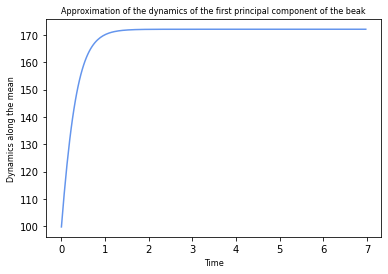

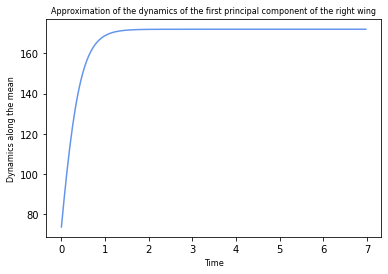

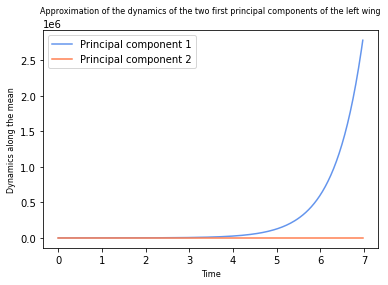

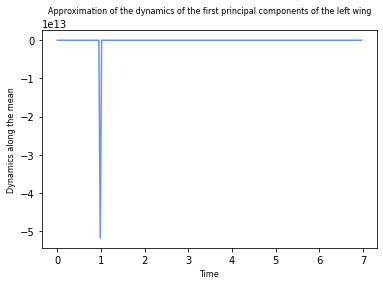

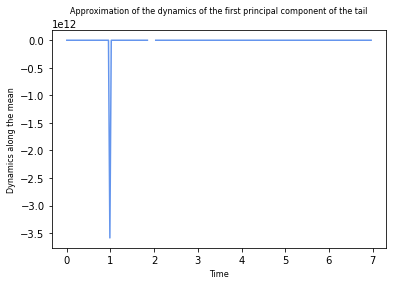

In [376]:
# Solving the ODE:

zb = odeint(functionb, X0b, t)

lib.plot(t,zb[:,0], c = 'cornflowerblue', label = 'Principal component 1')
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Approximation of the dynamics of the first principal component of the beak', fontsize = 8)
lib.savefig("SINDy_beak.png")
lib.show()

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

zr = odeint(functionr, X0r, t)

lib.plot(t,zr[:,0], c = 'cornflowerblue', label = 'Principal component 1')
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Approximation of the dynamics of the first principal component of the right wing', fontsize = 8)
lib.savefig("SINDy_rw.png")
lib.show()

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

zl = odeint(functionl, X0l, t)

lib.plot(t,zl[:,0], c = 'cornflowerblue', label = 'Principal component 1')
lib.plot(t,zl[:,1], c = 'coral', label = 'Principal component 2')
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Approximation of the dynamics of the two first principal components of the left wing', fontsize = 8)
lib.legend(loc = 'upper left', prop = {'size':10})
lib.savefig("SINDy_lw.png")
lib.show()

zl2 = odeint(functionl2, X0l2, t)

lib.plot(t,zl2[:,0], c = 'cornflowerblue', label = 'Principal component 1')
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Approximation of the dynamics of the first principal components of the left wing', fontsize = 8)
lib.savefig("SINDy_lw2.png")
lib.show()

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

zt = odeint(functiont, X0t, t)

lib.plot(t,zt[:,0], c = 'cornflowerblue', label = 'Principal component 1')
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Approximation of the dynamics of the first principal component of the tail', fontsize = 8)
lib.savefig("SINDy_tail.png")
lib.show()

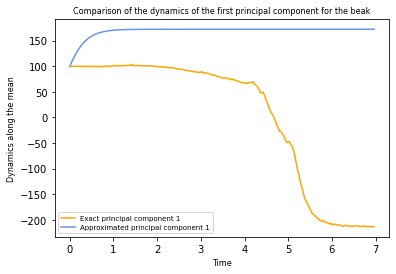

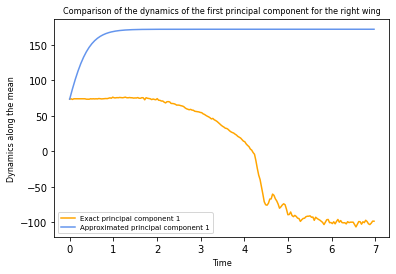

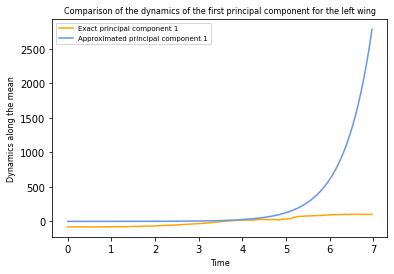

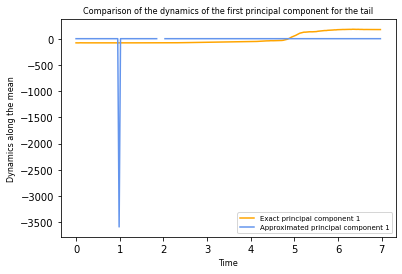

In [403]:
lib.plot(t, Sb[0]*VTb[0,0:220], c = 'orange', label = 'Exact principal component 1') 
lib.plot(t, zb[:,0], c = 'cornflowerblue', label = 'Approximated principal component 1') 
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Comparison of the dynamics of the first principal component for the beak', fontsize = 8)
lib.legend(loc = 'lower left', prop = {'size':7})
lib.savefig("Compare1_beak.png")
lib.show()

lib.plot(t, Sr[0]*VTr[0,0:220], c = 'orange', label = 'Exact principal component 1') 
lib.plot(t, zr[:,0], c = 'cornflowerblue', label = 'Approximated principal component 1') 
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Comparison of the dynamics of the first principal component for the right wing', fontsize = 8)
lib.legend(loc = 'lower left', prop = {'size':7})
lib.savefig("Compare1_rw.png")
lib.show()

lib.plot(t, Sl[0]*VTl[0,0:220], c = 'orange', label = 'Exact principal component 1') 
lib.plot(t, (1/1000)*zl[:,0], c = 'cornflowerblue', label = 'Approximated principal component 1') 
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Comparison of the dynamics of the first principal component for the left wing', fontsize = 8)
lib.legend(loc = 'upper left', prop = {'size':7})
lib.savefig("Compare1_lw.png")
lib.show()

lib.plot(t, St[0]*VTt[0,0:220], c = 'orange', label = 'Exact principal component 1') 
lib.plot(t, (1/1000000000)*zt[:,0], c = 'cornflowerblue', label = 'Approximated principal component 1') 
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Comparison of the dynamics of the first principal component for the tail', fontsize = 8)
lib.legend(loc = 'lower right', prop = {'size':7})
lib.savefig("Compare1_tail.png")
lib.show()

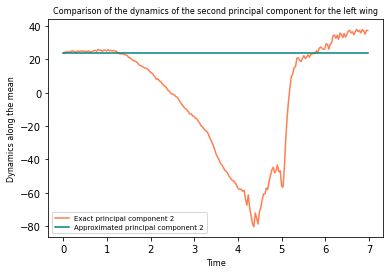

In [404]:
lib.plot(t, Sl[1]*VTl[1,0:220], c = 'coral', label = 'Exact principal component 2')
lib.plot(t, zl[:,1], c = 'teal', label = 'Approximated principal component 2')
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Comparison of the dynamics of the second principal component for the left wing', fontsize = 8)
lib.legend(loc = 'lower left', prop = {'size':7})
lib.savefig("Compare2_lw.png")
lib.show() 

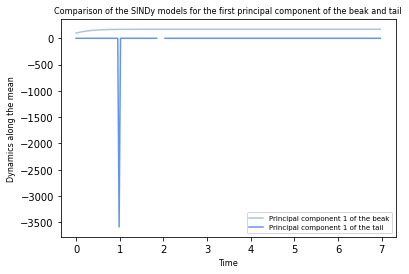

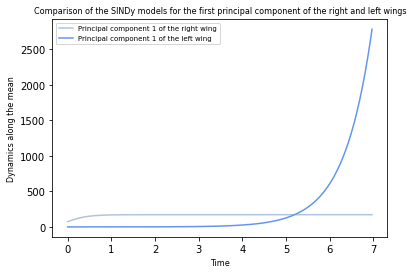

In [408]:
lib.plot(t,zb[:,0], c = 'lightsteelblue', label = 'Principal component 1 of the beak')
lib.plot(t,(1/1000000000)*zt[:,0], c = 'cornflowerblue', label = 'Principal component 1 of the tail')
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Comparison of the SINDy models for the first principal component of the beak and tail', fontsize = 8)
lib.legend(loc = 'lower right', prop = {'size':7})
lib.savefig("SINDy1_bt.png")
lib.show()

# Here, there should be some kind of symmetry, only changing at the very end when the beak folds over.

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

lib.plot(t,zr[:,0], c = 'lightsteelblue', label = 'Principal component 1 of the right wing')
lib.plot(t,(1/1000)*zl[:,0], c = 'cornflowerblue', label = 'Principal component 1 of the left wing')
lib.xlabel('Time', fontsize = 8)
lib.ylabel('Dynamics along the mean', fontsize = 8)
lib.title('Comparison of the SINDy models for the first principal component of the right and left wings', fontsize = 8)
lib.legend(loc = 'upper left', prop = {'size':7})
lib.savefig("SINDy1_rlw.png")
lib.show()

# Here, they should be perfectly symmetrical.

In [380]:
## FUTURE DIRECTION:

# Run another analysis where we compare motion along the axes rather than the corners.